## Try to learn the minimum function with keras

In [1]:
import numpy as np
from keras.layers import Dense, Activation, BatchNormalization, Input
from keras.models import Model, Sequential
from keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
%matplotlib inline

/home/nghiatt4/anaconda3/envs/cv36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def create_dataset(m = 10000, max_X = 10000):
    """
    m: number of data entries
    max_X: data is constrained in [-max_X, max_X)
    """
    x = np.random.randint(-max_X, max_X, (m, 2))
    y = np.argmin(x, axis=1)
    y = np.eye(2)[y]  # One hot encoding
    return x, y

In [3]:
X_train, Y_train = create_dataset()
X_val, Y_val = create_dataset(1000)

In [4]:
def create_model():
    X_input = Input(batch_shape=(None, 2))
    
    X = Dense(3)(X_input)
    X = BatchNormalization()(X)
    X = Activation('tanh')(X)
    
    X = Dense(3)(X)
    X = BatchNormalization()(X)
    X = Activation('tanh')(X)
    
    X = Dense(2)(X)
    X = Activation('sigmoid')(X)
    
    model = Model(inputs=X_input, outputs=X)
    return model

In [5]:
model = create_model()
optimizer = Adam(lr=0.03, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
model.fit(X_train, Y_train, epochs=100, batch_size=10000)

Epoch 1/100
10000/10000 [==============================] - 0s 14us/step - loss: 0.7515 - acc: 0.6061
Epoch 2/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.7128 - acc: 0.6349
Epoch 3/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.6752 - acc: 0.6680
Epoch 4/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.6387 - acc: 0.7020
Epoch 5/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.6040 - acc: 0.7376
Epoch 6/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.5715 - acc: 0.7612
Epoch 7/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.5419 - acc: 0.7611
Epoch 8/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.5143 - acc: 0.7749
Epoch 9/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.4863 - acc: 0.8046
Epoch 10/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.4566 - acc: 0.843

Epoch 83/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.0294 - acc: 0.9992
Epoch 84/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.0289 - acc: 0.9991
Epoch 85/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.0286 - acc: 0.9987
Epoch 86/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.0282 - acc: 0.9988
Epoch 87/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.0278 - acc: 0.9992
Epoch 88/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.0275 - acc: 0.9995
Epoch 89/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.0271 - acc: 0.9992
Epoch 90/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.0268 - acc: 0.9988
Epoch 91/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.0264 - acc: 0.9989
Epoch 92/100
10000/10000 [==============================] - 0s 1us/step - loss: 0.0261 - ac

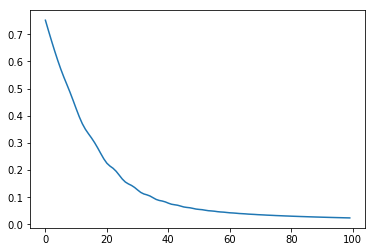

In [7]:
plt.plot(model.history.history['loss'])

In [8]:
loss, accuracy = model.evaluate(X_val, Y_val)
print(f'Loss = {loss}, accuracy = {accuracy}')

1000/1000 [==============================] - 0s 39us/step
Loss = 0.029424718648195267, accuracy = 0.9895


In [9]:
# Check if the model generalizes well with bigger numbers
X_test, _ = create_dataset(10, 10000000)
for inp in X_test:
    print(inp, inp[np.argmax(model.predict(np.expand_dims(inp, axis=0)))])

[-2365265 -6567759] -6567759
[ 8765610 -1074881] -1074881
[1201293 1416632] 1201293
[3469059 7881131] 3469059
[-3338698  -405794] -3338698
[-3479924 -5507460] -5507460
[-1610653  4895259] -1610653
[-1070131  5527263] -1070131
[ 5226025 -6211838] -6211838
[-3031653  9675734] -3031653
